Chapter9 Exercise7(d)

(d) find an approximate 90 percent confidence interval for $\psi$ using the parametric bootstrap

$n_{1}=n_{2}=200, X_{1}=160, X_{2}=148$

$X_{1}$~$Binomial(n_{1}, \frac{X_{1}}{n1})= Binomial (200, 0.8)$

$X_{2}$~$Binomial(n_{2}, \frac{X_{2}}{n2})= Binomial (200, 0.74)$

$\hat{\psi} = \frac{X_{1}}{n_{1}}-\frac{X_{2}}{n_{2}}= 0.06$

In [1]:
import numpy as np
import math
from scipy.stats import norm

In [2]:
X = np.array([1,2,3,4])
Y = np.array([5,6,7,8])


In [3]:
np.cov(X, Y)

array([[1.66666667, 1.66666667],
       [1.66666667, 1.66666667]])

In [2]:
n1 = 200
n2 = 200
X1 = 160
X2 = 148
group1 = np.zeros(n1)
group2 = np.zeros(n2)
for i in range(X1):
    group1[i] = 1
for i in range(X2):
    group2[i] = 1

In [3]:
Ne = 10**4
t_boot = np.empty(Ne)
for i in range (len(t_boot)):
    x_star_1 = np.random.choice(group1, n1, replace = True)
    x_star_2 = np.random.choice(group2, n2, replace = True)
    t_boot[i]= np.sum(x_star_1)/n1 - np.sum(x_star_2)/n2
se_boot = t_boot.std()
print("The standard error of parametric bootstrap for psi is: ", se_boot)


The standard error of parametric bootstrap for psi is:  0.041328608853311286


In [4]:
alpha = 0.1
z_10 = norm.ppf(1 - alpha/2)
psi = 0.06
CI = (psi -z_10 * se_boot, psi + z_10 * se_boot)
print("the approximate 90 percent confidence interval for psi using parametric bootstrap is: ", CI)

the approximate 90 percent confidence interval for psi using parametric bootstrap is:  (-0.007979512169227793, 0.1279795121692278)


Chapter9 Exercise9

(a) use the parametric bootstrap to get $\hat{se}$ and 95 percent confidence interval for $\theta$

In [52]:
import numpy as np
from scipy.stats import norm

In [117]:
n = 100
Ne = 10**4
X = norm.rvs(5, 1, n)
mu_hat = np.mean(X)
theta_hat = np.exp(np.mean(X))

In [118]:
t_boot_par = np.empty(Ne)
for i in range(Ne):
    x_star = norm.rvs(mu_hat, 1, n)
    t_boot_par[i] = np.exp(np.mean(x_star))
se_t_boot_par = t_boot_par.std()
print("the se using parametric bootstrap is: ", se_t_boot_par)
    

the se using parametric bootstrap is:  13.642376296059604


In [119]:
alpha = 0.05
z_5 = norm.ppf(1 - alpha/2)
CI = (theta_hat - z_5 * se_t_boot_par, theta_hat + z_5 * se_t_boot_par)
print("the approximate 95 percent confidence interval for psi using parametric bootstrap is: ", CI)

the approximate 95 percent confidence interval for psi using parametric bootstrap is:  (108.32586958943443, 161.80300199707398)


use the non-parametric bootstrap to get $\hat{se}$ and 95 percent confidence interval for $\theta$

In [120]:
theta_hat = np.exp(np.mean(X))
t_boot_nonpar = np.empty(Ne)
for i in range(Ne):
    x_star = np.random.choice(X, n, replace = True)
    t_boot_nonpar[i] = np.exp(np.mean(x_star))
se_t_boot_nonpar = t_boot_nonpar.std()
print("the se using nonparametric bootstrap is: ", se_t_boot_nonpar)

the se using nonparametric bootstrap is:  11.767367288323701


In [102]:
alpha = 0.05
z_5 = norm.ppf(1 - alpha/2)
CI = (theta_hat - z_5 * se_t_boot_nonpar, theta_hat + z_5 * se_t_boot_nonpar)
print("the approximate 95 percent confidence interval for psi using non-parametric bootstrap is: ", CI)

the approximate 95 percent confidence interval for psi using non-parametric bootstrap is:  (114.38489402033284, 173.2736673080651)


se generated by parametric bootstrap is almost the same as the se generated by non-parametric bootstrap. But the se generated by parametric and non-parametric bootstrap vary much more than the se generated by the delta method, depending on each independent experiment.

(b)

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.linspace(30, 300, 1000)

true sampling distribution of $\theta$

In [51]:
def theta_cdf(x):
    return norm.cdf(np.log(x), loc=5, scale=1/50)

theta_cdf_x = list(map(theta_cdf, x))
theta_cdf_x_pdf = np.empty(len(x))
theta_cdf_x_pdf[0] = 0
theta_cdf_x_pdf[1:] = np.diff(theta_cdf_x)

plot a histogrsm of the bootstrap replications for the parametric bootstrap. 


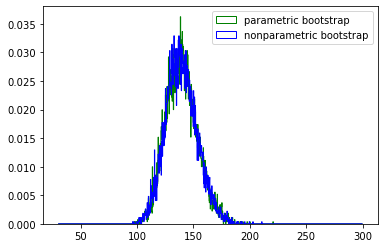

In [49]:
plt.hist(t_boot_par, x, density=True,  histtype='step', label = "parametric bootstrap", color = "green")
plt.hist(t_boot_nonpar, x, density=True, histtype='step',label = "nonparametric bootstrap", color = "blue")
plt.legend()
plt.show()

plot the approximation by the delta method and the true sampling distribution of $\hat{\theta}$ 

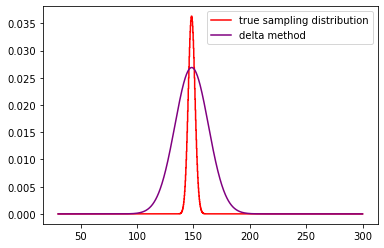

In [14]:
plt.step(x, theta_cdf_x_pdf, color='red', label="true sampling distribution")
plt.plot(x, stats.norm.pdf(x, np.exp(5), np.exp(5)/10), label= "delta method", color = "purple")
plt.legend()
plt.show()

The se of the delta method is $\frac{e^{5}}{10} = 14.8413$, which is larger than the sd of true sampling distribution

observe that the approximation by delta method is cloest to the true distribution of $\theta$ compared with the approximation by parametric bootstrap and nonparametrix bootstrap

Chapter9 Exercise10

(a) 
true distribution of $\hat{\theta}$ analytically

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [32]:
def theta_pdf(x):
    if x<0:
        return 0
    elif 0<=x<1:
        return 50*x**49
    else:
        return 1

In [33]:
bins = np.linspace(-0.2, 1.2, 1000)
theta_pdf_bins = list(map(theta_pdf, bins))


distribution of $\hat{\theta}$ according to parametric bootstrap

In [4]:
n = 50
Ne = 10**4
X = uniform.rvs(0,1,n)

In [5]:
theta_hat = np.max(X)
t_boot_par = np.empty(Ne)
for i in range(Ne):
    x_star = uniform.rvs(0,theta_hat, n)
    t_boot_par[i] = np.max(x_star)

    

distribution of $\hat{\theta}$ according to non-parametric bootstrap

In [6]:
t_boot_nonpar = np.empty(Ne)
for i in range(Ne):
    x_star = np.random.choice(X, n, replace = True)
    t_boot_nonpar[i] = np.max(x_star)


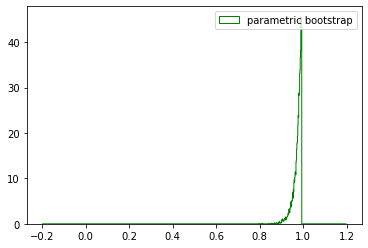

In [22]:
plt.hist(t_boot_par, bins,density = True, histtype="step",label = "parametric bootstrap", color = "green" )
plt.legend()
plt.show()

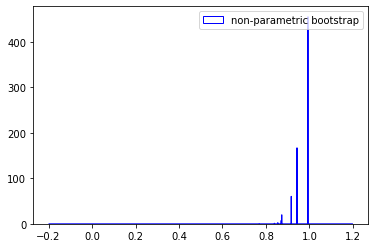

In [23]:
plt.hist(t_boot_nonpar,bins,density=True,histtype="step", label = "non-parametric bootstrap", color = "blue" )
plt.legend()
plt.show()

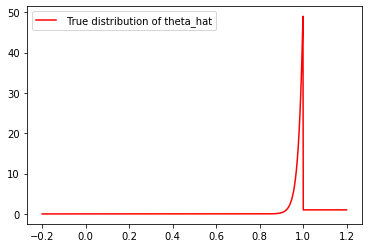

In [34]:

plt.plot(bins, theta_pdf_bins, label=" True distribution of theta_hat", color = "red")
plt.legend()
plt.show()

parametric bootstrap is a better approximation of the true distribution of $\hat{\theta}$

Additional problem 2

we implement the parametric bootstrap for a correlation estimation problem.

Let $W,Z \sim N(0,1)$ be independent. Define $X = W + \gamma Z$ and $Y = Z + \gamma W$.

Then
$\mathbb{E}[X] = \mathbb{E}[Y] = 0, \quad \mathbb{E}[X^2] = \mathbb{E}[Y^2] = 1 + \gamma^2, \quad \mathbb{E}[XY] = 2\gamma, $ 

so
$\rho_{X,Y} = \frac{\mathbb{E}[XY]}{\sqrt{ \mathbb{E}[X^2]\, \mathbb{E}[Y^2] }}  = \frac{2 \gamma }{1+\gamma^2}.
$

MLE for the model is given by 

$\hat{\mu}= \frac{1}{n}\sum_{i=1}^{n}X_{i}$

$\hat{\sum}= \frac{1}{n}\sum_{i=1}^{n}(X_{i}-\hat{\mu})(X_{i}-\hat{\mu})^{T}$

In [1]:
import numpy as np                         # Numerical computing
from matplotlib import pyplot as plt       # Plotting
from scipy import stats                    # Random Sampling
from tqdm import tqdm    
from scipy.stats import norm
# Keep track of progress for long loops

In [105]:
# Set the parameters
B = 1000      # number of bootstrap replicates
gamma = 0.1   # model parameter
Ne = 1000     # number of experiments

# Exact correlation
rho_exact = (2*gamma)/(1+gamma**2)

In [106]:
def sample_data(n, gamma, Ne):

    W = np.random.randn(Ne, n)  # Rows correspond to different experiments
    Z = np.random.randn(Ne, n)
    X = W + gamma*Z
    Y = Z + gamma*W
    return (X, Y)

# data of Ne independent experiment with sample size n (Ne, n)


In [107]:
def compute_rho_hat(X, Y):
    """
    Compute rho_hat for each experiment.
    X, Y have shape (Ne, n)
    Returns a vector of shape (Ne,)
    """
    # Estimated correlation for each each experiment (vector of length Ne)
    rho_hat = np.mean(X*Y, axis=1) / np.sqrt( np.mean(X*X, axis=1) * np.mean(Y*Y, axis=1) )
    return rho_hat

In [108]:
def bias_corrected_rho(X, Y, B):
    """
    Estimate the bias-corrected correlation coefficient using B bootstrap replicates.
    
    Note that here X and Y have shape (n,) and the output is a float.
    """
    # Get sample size
    n = X.shape[0]
    # Compute the plug-in estimate
    rho_hat = np.mean(X*Y) / np.sqrt( np.mean(X*X) * np.mean(Y*Y) )
    
    Z = np.array([X,Y])
    # using MLE estimator

    mu_hat_z = np.mean(Z, axis = 1)

    diff = np.zeros((2, n))
    for i in range(n):
        diff[:, i]= Z[:, i]-mu_hat_z
    
    summ = np.zeros((2,2))
    for i in range(0,n):
        summ += np.array([[(diff[0][i])**2, diff[0][i]*diff[1][i]],[diff[0][i]*diff[1][i], (diff[1][i])**2]])
    sigma_hat = summ / n

    # Pre-allocate space for bootstrap samples
    rho_boot = np.zeros(B)
    
    for b in range(B):
        # sample from our best-estimated distribution with estimators calculated from MLE.
        X_star, Y_star = np.random.multivariate_normal(mu_hat_z, sigma_hat, n).T

        # Compute bootstrap replicate
        rho_boot[b] = np.mean(X_star*Y_star) / np.sqrt( np.mean(X_star*X_star) * np.mean(Y_star*Y_star) )
    
    # Return the bias-corrected rho , = rho_hat - bias = rho_hat - (mean of rho_boot - rho_hat)
    return 2*rho_hat - np.mean(rho_boot)

In [109]:
def compute_rho_boot(X, Y, B):
    """
    Helper method to compute the bias corrected rho for many experiments.
    """
    Ne = X.shape[0]
    # Perform Ne experiments
    rho_boot = np.zeros(Ne)
    for i in range(Ne):
        rho_boot[i] = bias_corrected_rho(X[i], Y[i], B)
    return rho_boot

In [110]:
# Wrap everything into the following function.
def estimate_bias_RMSE(n, gamma, B, Ne, rho_exact):
    X, Y = sample_data(n, gamma, Ne)
    # Compute the plug-in and bias corrected bootstrap estimators
    rho_hat  = compute_rho_hat(X, Y)
    rho_boot = compute_rho_boot(X, Y, B)
    # Estimate the bias of each method
    bias = np.zeros(2)
    rmse = np.zeros(2)
    bias[0] = np.mean(rho_hat) - rho_exact # bias of the plug in estimator
    bias[1] = np.mean(rho_boot) - rho_exact # bias of rho_boot
    rmse[0] = np.sqrt(np.mean((rho_hat - rho_exact)**2)) # rmse of the plug in estimator
    rmse[1] = np.sqrt(np.mean((rho_boot - rho_exact)**2)) # rmse of the rho_boot
    return (bias, rmse)

In [111]:
# Compute the bias and rmse over many experiments for different sample sizes
nlist = [50, 100, 200, 250,300]

bias = np.zeros((len(nlist), 2))
rmse = np.zeros((len(nlist), 2))

for i in range(len(nlist)):
    n = nlist[i]
    bias[i, :], rmse[i, :] = estimate_bias_RMSE(i, gamma, B, Ne, rho_exact)
    print(n) # Print n to keep track of progress

/Users/yge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/yge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-108-63a92e68ca3b>:24: RuntimeWarning: invalid value encountered in true_divide
  sigma_hat = summ / n
<ipython-input-108-63a92e68ca3b>:31: RuntimeWarning: covariance is not positive-semidefinite.
  X_star, Y_star = np.random.multivariate_normal(mu_hat_z, sigma_hat, n).T


50
100
200
250
300


Text(0, 0.5, 'Bias')

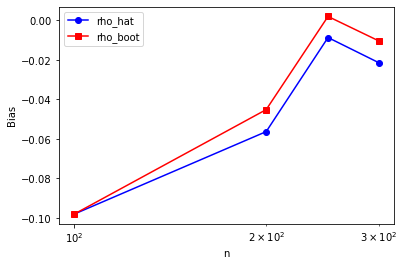

In [112]:
plt.semilogx(np.array(nlist), bias[:,0], c='b', marker='o', label='rho_hat')
plt.semilogx(np.array(nlist), bias[:,1], c='r', marker='s', label='rho_boot')
plt.legend()
plt.xlabel('n')
plt.ylabel('Bias')


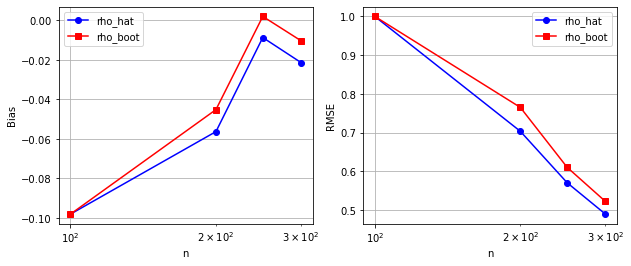

In [113]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,4))
ax[0].semilogx(nlist, bias[:,0], c='b', marker='o', label='rho_hat')
ax[0].semilogx(nlist, bias[:,1], c='r', marker='s', label='rho_boot')
ax[0].legend()
ax[0].set_xlabel('n')
ax[0].set_ylabel('Bias')
ax[0].grid()
ax[1].semilogx(nlist, rmse[:,0], c='b', marker='o', label='rho_hat')
ax[1].semilogx(nlist, rmse[:,1], c='r', marker='s', label='rho_boot')
ax[1].legend()
ax[1].set_xlabel('n')
ax[1].set_ylabel('RMSE')
ax[1].grid()


We see that as we increase the sample size $n$, the bias decreases and the bias of rho_boot is smaller than the bias of the plug in estimator. However, the RMSE of rho_boot is larger than that of the plug in estimator. The result is similar to the one of parametric bootstrap in HW3.